In [20]:
import wave;import copy; import matplotlib.pyplot as plt;import numpy as np
d_raw = np.loadtxt('D:\Download\Papper\S4dot19\MackeyGlass500points.txt', float)
N=511; input_raw_max=max(d_raw);input_raw_min=min(d_raw);
for tt in range(0,N):
    d_raw[tt]=(0)+((d_raw[tt]-input_raw_min)*(0.1-0))/(input_raw_max-input_raw_min)
snr = 30;info_power = ((np.linalg.norm(d_raw))**2)/N;snr_lin = 10**(snr/10);noise_power = info_power/snr_lin
d_noise= d_raw+np.sqrt(noise_power)*np.random.standard_normal(size=N);error_deltas = np.sum(d_raw**2)/N  
def PNFIR_speech_model(input_data,desire_data,M_num,p_num,train):
    nonlin_input_len=p_num+1;
    weight_nonlin = np.zeros(M_num*nonlin_input_len).reshape(M_num,nonlin_input_len)
    weight_linear = np.zeros(M_num)
    value_a=0
    #weight_a=np.zeros(1)
    lambda_a=0
    input_module = np.zeros(M_num*nonlin_input_len).reshape(M_num,nonlin_input_len);
    input_module_pd1 = np.zeros_like(input_module)
    external_input = np.zeros(M_num); 
    output_modul = np.zeros(M_num*(len(input_data))).reshape(M_num,len(input_data)); 
    output_nonlin = np.zeros_like(output_modul);
    output_linear = np.zeros_like(input_data)
    output_filter = np.zeros_like(input_data)
    dif_output_modul = np.zeros(M_num); 
    error = np.zeros_like(input_data)
    for i in range(M_num+p_num-1,len(input_data)):
        for ii in range(0,M_num):   # external_input(r) 
            if(ii==(M_num-1)):
                external_input[ii]=output_nonlin[0,i-1]
            else :
                external_input[ii]=output_nonlin[ii+1,i]
            for iii in range(0,p_num):
                input_module[ii,iii]=input_data[i-ii-iii-1] # p input
            input_module[ii,p_num]  = external_input[ii]
            output_modul[ii,i]=np.dot(weight_nonlin[ii,:],input_module[ii,:].T)
            output_nonlin[ii,i]=1./(1+np.exp((-1)*(copy.deepcopy(output_modul[ii,i]))))   
            #dif_output_modul=input_module[ii,:]*( np.exp((-1)*(copy.deepcopy(output_modul[ii,i]))) )/( (1+np.exp((-1)*(copy.deepcopy(output_modul[ii,i]))))*(1+np.exp((-1)*(copy.deepcopy(output_modul[ii,i])))) )
            dif_output_modul[ii]=( np.exp((-1)*(copy.deepcopy(output_modul[ii,i]))) )/( (1+np.exp((-1)*(copy.deepcopy(output_modul[ii,i]))))*(1+np.exp((-1)*(copy.deepcopy(output_modul[ii,i])))) )
        output_linear=np.dot(weight_linear,output_nonlin[:,i].T)
        lambda_a=1./(1+np.exp((-1)*(copy.deepcopy(value_a))))
        output_filter[i]=lambda_a*output_linear+(1-lambda_a)*(sum(output_modul[:,i]))     
        error[i]=desire_data[i] - output_filter[i]
        gama=train[4]
        for iiii in range(0,M_num):
            input_module_pd1[iiii,:]=input_module[iiii,:]*(lambda_a*dif_output_modul[iiii]*weight_linear[iiii]+1-lambda_a);
            if(0==train[3]):
                weight_nonlin[iiii,:]+=train[0]*error[i]*input_module_pd1[iiii,:]
            else:
                weight_nonlin[iiii,:]+=train[0]*error[i]*input_module_pd1[iiii,:]/(gama+np.linalg.norm(input_module_pd1[iiii,:])**2) 
        if(0==train[3]):
            weight_linear+=train[1]*error[i]*(output_nonlin[:,i]).T
        else:
            weight_linear+=train[1]*error[i]*((output_nonlin[:,i]).T)/(gama+np.linalg.norm(((output_nonlin[:,i]).T))**2)
        value_a+=train[2]*error[i]*(output_linear-(sum(output_modul[:,i])))*lambda_a*(1-lambda_a)
    return output_filter,error,weight_linear,weight_nonlin,value_a
N = 511; M=5;  p=3; apoch = 1; error_sum=np.zeros(N); RMSE=np.zeros(apoch); prediction=np.zeros(N)
train_para=np.array([0.1,0.00001,0.9,1,0])  
train_para=np.array([0.00001,1,0.9,0,0])  
for i in range(0,apoch):
    output_filter,error,weight_lin,weight_non,value_a=PNFIR_speech_model(d_raw,d_noise,M,p,train_para)
    error_sum+=error
    prediction=prediction+output_filter
    RMSE[i]=np.sqrt(np.mean(error**2))
    if(0==i%10):print('apoch:',i,' ',RMSE[i] )
error_sum=error_sum/apoch
prediction=prediction/apoch
print('average RP=',np.mean(RMSE)) 

apoch: 0   0.0071278341305671435
average RP= 0.0071278341305671435


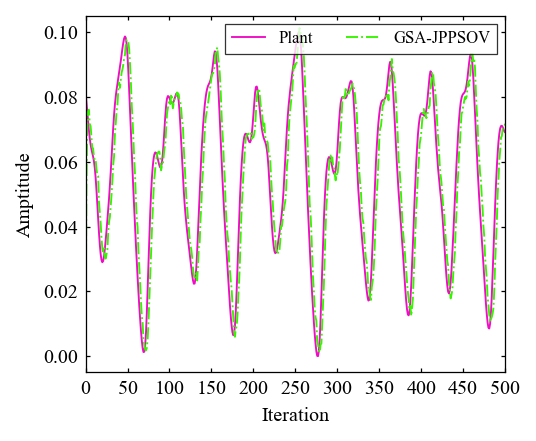

In [21]:
import matplotlib as mpl;import matplotlib.pyplot as plt;
import matplotlib.font_manager as fm;from matplotlib.ticker import MultipleLocator,AutoMinorLocator
# 图片大小,单位厘米
fw = 8.69/2.54; fh = 7.18/2.54 
# 设置全局的字体
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.style'] = 'normal'
mpl.rcParams['font.variant'] = 'normal'
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['font.stretch'] ='normal'
mpl.rcParams['font.size'] = 9
plt.rcParams['mathtext.fontset'] = 'stix' 
font0 = {'fontfamily': 'serif',
         'fontname': 'Times New Roman',
         'fontstyle': 'normal',
         'fontvariant': 'normal',
         'fontweight': 'normal',
         'fontstretch': 'normal',
         'fontsize': 9}
tick_font = fm.FontProperties(family='Times New Roman', style='normal', variant='normal', weight='normal',
                           stretch='normal', size=9)
fig = plt.figure(figsize=(fw,fh),dpi=160); 
ax = fig.add_subplot(111)
ax.plot(np.arange(0,N-8),d_raw[8:N],label='Plant',color='#F00CC5',linewidth=0.85) #Target value  #F00CC5  #37F500
ax.plot(np.arange(0,N-8),prediction[7:N-1],label='GSA-JPPSOV',color='#37F500',linestyle='-.',linewidth=0.85)

ax.set_xlim(0,N-11);ax.set_ylim(-0.005,0.105);
ax.tick_params(which='major',length=2,width=0.57,bottom=True, top=True, left=True, right=True);
ax.tick_params(which='minor',length=1.7,width=0.57,bottom=True, top=True, left=True, right=True)
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.tick_params(axis="both", which='both', direction="in") 
ax.xaxis.set_major_locator(MultipleLocator(base=100))
ax.xaxis.set_minor_locator(MultipleLocator(base=50))
ax.xaxis.set_minor_formatter((mpl.ticker.FormatStrFormatter('%.0f')))
ax.yaxis.set_major_locator(MultipleLocator(base=0.02))
#ax.yaxis.set_minor_locator(MultipleLocator(base=0.01))
# 设置tick_label字体
for xtlabel in ax.get_xticklabels():
    xtlabel.set_fontproperties(tick_font)
for ytlabel in ax.get_yticklabels():
    ytlabel.set_fontproperties(tick_font)
# 设置图形变宽线宽度和颜色
bwith = 0.57
ax.spines['left'].set_color((0,0,0,1))
ax.spines['left'].set_linewidth(bwith)
ax.spines['right'].set_color((0,0,0,1))
ax.spines['right'].set_linewidth(bwith)
ax.spines['top'].set_color((0,0,0,1))
ax.spines['top'].set_linewidth(bwith)
ax.spines['bottom'].set_color((0,0,0,1))
ax.spines['bottom'].set_linewidth(bwith)
# 设置图形坐标轴标签和标题字体
ax.set_xlabel('Iteration',fontdict=font0) 
ax.set_ylabel('Amptitude',fontdict=font0)
ax.legend(loc='upper right',ncol=2,frameon=True,edgecolor='black',facecolor='white',\
          shadow=False,fancybox=False,fontsize='small'  ).get_frame().set_linewidth(0.57) 
plt.tight_layout()   
#fig.savefig('D:\\Postgraduatee\\sketch\photo\\S7dot25\\chaotic_presGSAPAVF.pdf', bbox_inches='tight', pad_inches=0.05, dpi=1200)
plt.show();

In [22]:
problem = {
    'num_vars': 15,
    'names': ['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4',   \
              'x1_0', 'x1_1', 'x1_2', 'x1_3', 'x1_4',   \
              'x2_0', 'x2_1', 'x2_2', 'x2_3', 'x2_4', 
             ],
    'bounds': [
               [0,1],[0,1],[0,1],[0,1],[0,1],   \
               [0,1],[0,1],[0,1],[0,1],[0,1],   \
               [0,1],[0,1],[0,1],[0,1],[0,1],
               ] }
factor_num = problem['num_vars']
def SA_model(module_num,p_num,weight_linear,weight_nonlin,value_a,X):
    inputlen=p_num+1;
    input_module = np.zeros(module_num*inputlen).reshape(module_num,inputlen);
    external_input = np.zeros(module_num);
    output_modul = np.zeros(module_num*(len(X))).reshape(module_num,len(X)); output_nonlin = np.zeros_like(output_modul)
    output_linear = np.zeros(len(X))
    output_filter = np.zeros(len(X))
    for j in range(0,len(X)):
        for jj in range(0,module_num):
            if(jj==(module_num-1)):
                external_input[jj]=output_nonlin[0,j-1]
            else :
                external_input[jj]=output_nonlin[jj+1,j]
            for jjj in range(1,p_num+1):
                input_module[jj,jjj-1]=X[j,p_num*jj+jjj-1] # p input
            input_module[jj,p_num]  = external_input[jj]
            output_modul[jj,j]=np.dot(weight_nonlin[jj,:],input_module[jj,:].T)
            output_nonlin[jj,j]=1./(1+np.exp((-1)*(copy.deepcopy(output_modul[jj,j]))))     
        output_linear[j]=np.dot(weight_linear,output_nonlin[:,j].T)
        lambda_a=1./(1+np.exp((-1)*(copy.deepcopy(value_a))))
        output_filter[j]=lambda_a*output_linear[j]+(1-lambda_a)*(sum(output_modul[:,j]))    
    return output_filter       

In [25]:
# EFAST method
from SALib.analyze import fast;from SALib.sample import fast_sampler
module_number=5;  p=3;  circle = 1; 
Si_efast_first= np.zeros(circle*factor_num).reshape(circle,factor_num);
Si_efast_total=np.zeros_like(Si_efast_first)
sum_first= np.zeros(factor_num); avg_sen_first = np.zeros(factor_num); 
sum_total= np.zeros(factor_num); avg_sen_total = np.zeros(factor_num);
for i in range(0,circle):
    X_efast = fast_sampler.sample(problem, 10000)
    Y_efast = SA_model( module_number,p,weight_lin,weight_non,value_a,X_efast[:,:factor_num])
    if(i==circle-1): Si_efast = fast.analyze(problem, Y_efast, print_to_console=False)
    else : Si_efast = fast.analyze(problem, Y_efast, print_to_console=False)
    Si_efast_df = (Si_efast.to_df()).values
    Si_efast_first[i,:] = Si_efast_df[:,0]
    Si_efast_total[i,:]  = Si_efast_df[:,1]
    for ii in range(0,factor_num):
        sum_first[ii] = sum_first[ii]+Si_efast_first[i,ii]
        sum_total[ii] = sum_total[ii]+Si_efast_total[i,ii]
for j in range(0,factor_num):
    avg_sen_first[j]=sum_first[j]/circle
    avg_sen_total[j]=sum_total[j]/circle

sum(avg_sen_first),(avg_sen_first[0]+avg_sen_first[3])/sum(avg_sen_first[:]),\
sum(avg_sen_total),(avg_sen_total[0]+avg_sen_total[3])/sum(avg_sen_total[:])

(0.9971062887220743,
 0.013811936585206108,
 1.0185495196517418,
 0.016149611791424472)

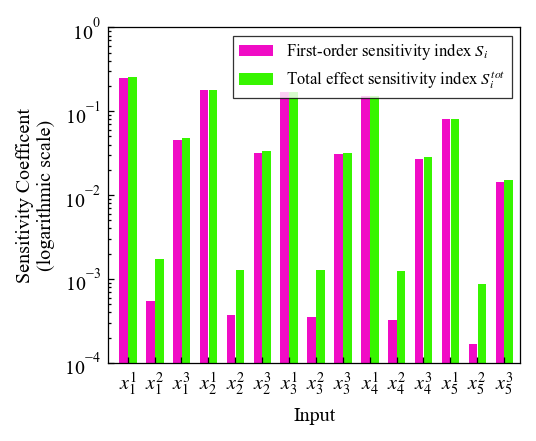

In [26]:
import wave;import matplotlib.pyplot as plt;import numpy as np
d_raw = np.loadtxt('D:\Postgraduatee\sketch\cheets\s6dot30_chaotic_bar', float)
avg_sen_first=d_raw[:,0]
avg_sen_total=d_raw[:,1]
import matplotlib as mpl;import matplotlib.pyplot as plt;
import matplotlib.font_manager as fm; from matplotlib.ticker import MultipleLocator,AutoMinorLocator
# 图片大小,单位厘米
fw = 17/2.54; fh = 7.38/2.54
fw = 8.69/2.54; fh = 7.18/2.54 
# 设置全局的字体
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.style'] = 'normal'
mpl.rcParams['font.variant'] = 'normal'
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['font.stretch'] ='normal'
mpl.rcParams['font.size'] = 9
plt.rcParams['mathtext.fontset'] = 'stix' # 用tex公式的形式输入英文和公式，以显示Times New Roman字体
font0 = {'fontfamily': 'serif',
         'fontname': 'Times New Roman',
         'fontstyle': 'normal',
         'fontvariant': 'normal',
         'fontweight': 'normal',
         'fontstretch': 'normal',
         'fontsize': 9}

tick_font = fm.FontProperties(family='Times New Roman', style='normal', variant='normal', weight='normal',
                           stretch='normal', size=9)

fig = plt.figure(figsize=(fw,fh),dpi=160); ax = fig.add_subplot(111)

labels = [  "${x_{1}^1}$",'$x_{1}^2$','$x_{1}^3$','$x_{2}^1$' ,'$x_{2}^2$','$x_{2}^3$',\
            '$x_{3}^1$','$x_{3}^2$','$x_{3}^3$','$x_{4}^1$' ,'$x_{4}^2$','$x_{4}^3$',\
            '$x_{5}^1$','$x_{5}^2$','$x_{5}^3$'
         ]
width = 0.8 
x=np.zeros(len(labels))
for i in range(1,len(labels)):
    x[i]=x[i-1]+2.5   
plt.bar(x,avg_sen_first,width=width,label='First-order sensitivity index $S_i$',color='#F00CC5')
for i in range(len(x)):
    x[i] = x[i]+width+0.025   #这里设置的是第二个柱对应的横坐标，因为这里想让两个柱状图之间有点空隙，就让横坐标右移了一些
plt.bar(x, avg_sen_total,width=width,label="Total effect sensitivity index $S_i^{tot}$",color='#37F500')
xx = np.zeros_like(x)
xx=x-0.43
plt.xticks(xx, labels, rotation='horizontal') #这里是因为x轴的标签不太居中，所以在这里通过index设置一下看能不能居中，rotation是标签的方向，也可以设置成垂直之类的
#ax.set_xticklabels(labels,font_manager.FontProperties=fm) 


ax.tick_params(which='major',length=2.5,width=0.57,bottom=True, top=False, left=True, right=False);
ax.tick_params(which='minor',length=1.4,width=0.57,bottom=True, top=False, left=True, right=False)
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.tick_params(axis="both", which='both', direction="in") 
ax.tick_params(axis="both", which='both', direction="in") 

ax.set_yscale("log",base=10) 
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=10))
ax.yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
ax.set_ylim(1e-4,1);
ax.set_xlim(xx[0]-1.8,xx[len(xx)-1]+1.5);

# 设置tick_label字体
for xtlabel in ax.get_xticklabels():
    xtlabel.set_fontproperties(tick_font)
for ytlabel in ax.get_yticklabels():
    ytlabel.set_fontproperties(tick_font)
# 设置图形变宽线宽度和颜色
bwith = 0.57
ax.spines['left'].set_color((0,0,0,1))
ax.spines['left'].set_linewidth(bwith)
ax.spines['right'].set_color((0,0,0,1))
ax.spines['right'].set_linewidth(bwith)
ax.spines['top'].set_color((0,0,0,1))
ax.spines['top'].set_linewidth(bwith)
ax.spines['bottom'].set_color((0,0,0,1))
ax.spines['bottom'].set_linewidth(bwith)
# 设置图形坐标轴标签和标题字体
ax.set_xlabel('Input',fontdict=font0) 
ax.set_ylabel('Sensitivity Coefficent\n(logarithmic scale)',fontdict=font0)  
ax.legend(loc='upper right',ncol=1,frameon=True,edgecolor='black',facecolor='white',\
          shadow=False,fancybox=False,fontsize='small'  ).get_frame().set_linewidth(0.57)
plt.tight_layout() 
#fig.savefig('D:\\Postgraduatee\\sketch\photo\\S7dot25\\bar_chaotic02.eps', bbox_inches='tight', pad_inches=0.05,dpi=1200)
plt.show();

In [66]:
import wave; import matplotlib.pyplot as plt; import numpy as np
d_raw = np.loadtxt('D:\Download\Papper\S4dot19\MackeyGlass500points.txt', float)
N=511; input_raw_max=max(d_raw);input_raw_min=min(d_raw);
for tt in range(0,N):
    d_raw[tt]=(0)+((d_raw[tt]-input_raw_min)*(0.1-0))/(input_raw_max-input_raw_min)
snr = 30;info_power = ((np.linalg.norm(d_raw))**2)/N;snr_lin = 10**(snr/10);noise_power = info_power/snr_lin
d_noise= d_raw+np.sqrt(noise_power)*np.random.standard_normal(size=N);error_deltas = np.sum(d_raw**2)/N  
def PNFIR_speech_SA_model(input_data, desire_data, train):
    M_num=5;  p_num=2; 
    nonlin_input_len=p_num+1;
    weight_nonlin = np.zeros(M_num*nonlin_input_len).reshape(M_num,nonlin_input_len)
    weight_linear = np.zeros(M_num)
    weight_nonlin = 0.1*np.ones(M_num*nonlin_input_len).reshape(M_num,nonlin_input_len)
    #weight_linear = 0.1*np.random.random(M_num)   # 0.0048
    #weight_linear = 0.1*np.random.standard_normal(M_num)    # 0.0047
    weight_linear = 0.1*np.ones(M_num)
    value_a=0
    lambda_a=0
    input_module = np.zeros(M_num*nonlin_input_len).reshape(M_num,nonlin_input_len);
    input_module_pd1 = np.zeros_like(input_module)
    external_input = np.zeros(M_num); 
    output_modul = np.zeros(M_num*(len(input_data))).reshape(M_num,len(input_data)); 
    output_nonlin = np.zeros_like(output_modul);
    output_linear = np.zeros_like(input_data)
    output_filter = np.zeros_like(input_data)
    dif_output_modul = np.zeros(M_num); 
    error = np.zeros_like(input_data)
    for i in range(M_num+p_num,len(input_data)):
        for ii in range(0,M_num):   # external_input(r) 
            if(ii==(M_num-1)):
                external_input[ii]=output_nonlin[0,i-1]
            else :
                external_input[ii]=output_nonlin[ii+1,i]
            for iii in range(0,p_num):
                if(0==iii): 
                    input_module[ii,iii]=input_data[i-ii-iii-1] # p input
                else:
                    input_module[ii,iii]=input_data[i-ii-iii-1-1] # p input
            input_module[ii,p_num]  = external_input[ii]
            output_modul[ii,i]=np.dot(weight_nonlin[ii,:],input_module[ii,:].T)
            output_nonlin[ii,i]=1./(1+np.exp((-1)*(copy.deepcopy(output_modul[ii,i]))))   
            #dif_output_modul=input_module[ii,:]*( np.exp((-1)*(copy.deepcopy(output_modul[ii,i]))) )/( (1+np.exp((-1)*(copy.deepcopy(output_modul[ii,i]))))*(1+np.exp((-1)*(copy.deepcopy(output_modul[ii,i])))) )
            dif_output_modul[ii]=( np.exp((-1)*(copy.deepcopy(output_modul[ii,i]))) )/( (1+np.exp((-1)*(copy.deepcopy(output_modul[ii,i]))))*(1+np.exp((-1)*(copy.deepcopy(output_modul[ii,i])))) )
        output_linear=np.dot(weight_linear,output_nonlin[:,i].T)
        lambda_a=1./(1+np.exp((-1)*(copy.deepcopy(value_a))))
        output_filter[i]=lambda_a*output_linear+(1-lambda_a)*(sum(output_modul[:,i]))     
        error[i]=desire_data[i] - output_filter[i]
        gama=train[4]
        for iiii in range(0,M_num):
            input_module_pd1[iiii,:]=input_module[iiii,:]*(lambda_a*dif_output_modul[iiii]*weight_linear[iiii]+1-lambda_a);
            if(0==train[3]):
                weight_nonlin[iiii,:]+=train[0]*error[i]*input_module_pd1[iiii,:]
            else:
                weight_nonlin[iiii,:]+=train[0]*error[i]*input_module_pd1[iiii,:]/(gama+np.linalg.norm(input_module_pd1[iiii,:])**2) 
        if(0==train[3]):
            weight_linear+=train[1]*error[i]*(output_nonlin[:,i]).T
        else:
            weight_linear+=train[1]*error[i]*((output_nonlin[:,i]).T)/(gama+np.linalg.norm(((output_nonlin[:,i]).T))**2)
        value_a+=train[2]*error[i]*(output_linear-(sum(output_modul[:,i])))*lambda_a*(1-lambda_a)
    return output_filter,error,weight_linear,weight_nonlin,value_a

apoch = 200; 
train_para=np.array([0.9,1,0.9,0,0]) 
error_sum_GSA=np.zeros(N); RMSE_GSA=np.zeros(apoch); prediction_GSA=np.zeros(N); MRMSE_GSA=0
for i in range(0,apoch):
    d_noise=np.zeros_like(d_raw)
    snr = 30;info_power = ((np.linalg.norm(d_raw))**2)/N;snr_lin = 10**(snr/10);noise_power = info_power/snr_lin
    d_noise= d_raw+np.sqrt(noise_power)*np.random.standard_normal(size=N);error_deltas = np.sum(d_raw**2)/N  
     
    output_filter_GSA,error_GSA,weight_lin,weight_non,value_a=PNFIR_speech_SA_model(d_raw,d_noise,train_para)
    error_sum_GSA+=error_GSA;prediction_GSA+=output_filter_GSA;RMSE_GSA[i]=np.sqrt(np.mean(error_GSA[9:N-1]**2))
    if(0==i%50):
        print('apoch:',i,'RMSE ',RMSE_GSA[i] )
error_sum_GSA/=apoch; prediction_GSA/=apoch; MRMSE_GSA=np.sqrt(np.mean(error_GSA[:]**2))
print('Mean RMSE:',np.mean(RMSE_GSA))    

apoch: 0 RMSE  0.004474894021648255
apoch: 50 RMSE  0.004754475564511379
apoch: 100 RMSE  0.004596661092180745
apoch: 150 RMSE  0.00459277681045543
Mean RMSE: 0.004673301499905893


In [67]:
weight_lin,weight_non

(array([0.01699466, 0.01678476, 0.01662912, 0.01652651, 0.01531317]),
 array([[0.08722651, 0.08214088, 0.1       ],
        [0.08443907, 0.08042599, 0.1       ],
        [0.08214132, 0.0793057 , 0.1       ],
        [0.08042631, 0.07872609, 0.1       ],
        [0.07931052, 0.07859941, 0.08054924]]))

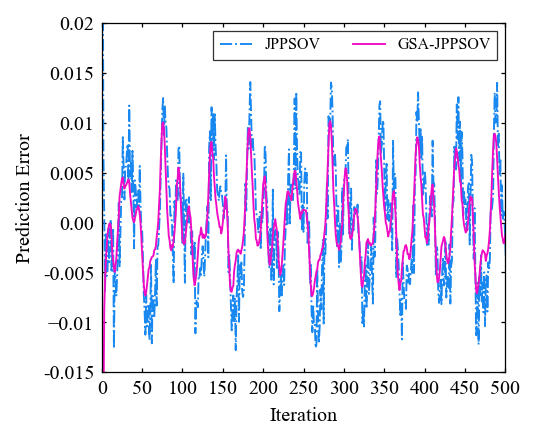

In [68]:
import matplotlib as mpl;import matplotlib.pyplot as plt;import copy
import matplotlib.font_manager as fm;from matplotlib.ticker import MultipleLocator,AutoMinorLocator
# 图片大小,单位厘米
fw = 8.69/2.54; fh = 7.181/2.54 
# 设置全局的字体
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.style'] = 'normal'
mpl.rcParams['font.variant'] = 'normal'
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['font.stretch'] ='normal'
mpl.rcParams['font.size'] = 9
plt.rcParams['mathtext.fontset'] = 'stix' 
font0 = {'fontfamily': 'serif',
         'fontname': 'Times New Roman',
         'fontstyle': 'normal',
         'fontvariant': 'normal',
         'fontweight': 'normal',
         'fontstretch': 'normal',
         'fontsize': 9}
tick_font = fm.FontProperties(family='Times New Roman', style='normal', variant='normal', weight='normal',
                           stretch='normal', size=9)

fig = plt.figure(figsize=(fw,fh),dpi=160);     
 
ax = fig.add_subplot(111)
ax.plot(np.arange(0,N-8),error_sum[7:N-1],label='JPPSOV', linestyle='-.', color='#1887F0',linewidth=0.85)
ax.plot(np.arange(0,N-8),error_sum_GSA[7:N-1],label='GSA-JPPSOV',color='#F00CC5',linewidth=0.85)
#ax.plot(np.arange(0,N-8),error_sum_SOV[7:N-1],label='SOV', linestyle=':', color='#37F500',linewidth=0.85)

ax.set_xlim(0,N-11);
ax.set_ylim(-0.015,0.02);
ax.tick_params(which='major',length=2,width=0.57,bottom=True, top=True, left=True, right=True);
ax.tick_params(which='minor',length=1.7,width=0.57,bottom=True, top=True, left=True, right=True)
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.tick_params(axis="both", which='both', direction="in") 
ax.xaxis.set_major_locator(MultipleLocator(base=100))
ax.xaxis.set_minor_locator(MultipleLocator(base=50))
ax.xaxis.set_minor_formatter((mpl.ticker.FormatStrFormatter('%.0f')))
ax.yaxis.set_major_locator(MultipleLocator(base=0.01))
ax.yaxis.set_minor_locator(MultipleLocator(base=0.005))
ax.yaxis.set_minor_formatter((mpl.ticker.FormatStrFormatter('%.3f')))
# 设置tick_label字体
for xtlabel in ax.get_xticklabels():
    xtlabel.set_fontproperties(tick_font)
for ytlabel in ax.get_yticklabels():
    ytlabel.set_fontproperties(tick_font)
# 设置图形变宽线宽度和颜色
bwith = 0.57
ax.spines['left'].set_color((0,0,0,1))
ax.spines['left'].set_linewidth(bwith)
ax.spines['right'].set_color((0,0,0,1))
ax.spines['right'].set_linewidth(bwith)
ax.spines['top'].set_color((0,0,0,1))
ax.spines['top'].set_linewidth(bwith)
ax.spines['bottom'].set_color((0,0,0,1))
ax.spines['bottom'].set_linewidth(bwith)
# 设置图形坐标轴标签和标题字体
ax.set_xlabel('Iteration',fontdict=font0)  
ax.set_ylabel('Prediction Error',fontdict=font0)  
# ax.legend(loc='best',ncol=3,frameon=True,edgecolor='black',facecolor='white',\
#           shadow=False,fancybox=False,fontsize='small').get_frame().set_linewidth(0.57) 
ax.legend(loc='best',ncol=3,frameon=True,edgecolor='black',facecolor='white',\
          shadow=False,fancybox=False,fontsize='small',prop={"family": "Times New Roman", "size": 7.21}  ).get_frame().set_linewidth(0.57)
plt.tight_layout()   
#fig.savefig('D:\\Postgraduatee\\sketch\photo\\S7dot25\\chaotic_error.pdf', bbox_inches='tight', pad_inches=0.05, dpi=1200)
plt.show();